<a href="https://colab.research.google.com/github/AsraniSanjana/All_Codes/blob/main/All_Semester_Codes/ML_sem7/models/miniproject/ML_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **To recommend movies based on cluster of people present at a mall or gathering**


Group members:
- Sanjana Asrani  |  01
- Vivek Balani | 05
- Yash Brid | 11
- Neeraj Chawla | 12

In [ ]:
!pip install tabulate

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Imports

This cell contains import statements for various Python libraries and modules that you'll be using in your analysis, including NumPy, Pandas, NetworkX, tabulate, Matplotlib, and scikit-learn.

In [ ]:
import ast
import numpy as np
import pandas as pd
import networkx as nx
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Loading Datasets

This cell specifies file paths for two datasets: movies and ratings.
It loads the datasets into Pandas DataFrames: movies and ratings.
It displays the first few rows of each dataset using the .head() method.

In [ ]:
# File paths to for the datasets
movies_file_path = '/content/drive/MyDrive/Life of Sem 7/ML/Project Datasets/movies.csv'
ratings_file_path = '/content/drive/MyDrive/Life of Sem 7/ML/Project Datasets/ratings.csv'

# Load the datasets
movies = pd.read_csv(movies_file_path)
ratings = pd.read_csv(ratings_file_path)

# Displaying both datasets in a single output
movies.head()

,movieId,title,genres,vote_average,vote_count
0,2,Ariel,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",7.1,44
1,3,Shadows in Paradise,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",7.1,35
2,5,Four Rooms,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",6.5,539
3,6,Judgment Night,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",6.4,79
4,11,Star Wars,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",8.1,6778


In [ ]:
ratings.head()

,userId,movieId,rating
0,15,2,2.0
1,19,2,3.0
2,30,2,2.0
3,32,2,4.0
4,41,2,3.5


# Calculate User's Genre Preferences

This cell defines a function calculate_genre_preferences that calculates a user's genre preferences based on their movie ratings.
It iterates through the user's ratings, extracts genre information from movies, and computes genre preferences.
The genre preferences are normalized by dividing the sum of ratings by the count of ratings for each genre.

In [ ]:
# Calculate user's genre preferences
def calculate_genre_preferences(user_id, ratings, movies):
    user_ratings = ratings[ratings['userId'] == user_id]
    genre_preferences = {}
    for index, row in user_ratings.iterrows():
        movie_id = row['movieId']
        movie_info = movies[movies['movieId'] == movie_id]
        if not movie_info.empty:
            movie_genres = ast.literal_eval(movie_info['genres'].values[0])
            rating = row['rating']
            for genre in movie_genres:
                genre_id = genre['id']
                if genre_id not in genre_preferences:
                    genre_preferences[genre_id] = {'sum_ratings': 0, 'count_ratings': 0}
                genre_preferences[genre_id]['sum_ratings'] += rating
                genre_preferences[genre_id]['count_ratings'] += 1
    # Normalize genre preferences
    for genre_id, prefs in genre_preferences.items():
        prefs['normalized_rating'] = prefs['sum_ratings'] / prefs['count_ratings']
    return genre_preferences

# Calculate Genre Preferences for All Users

This cell calculates genre preferences for all users by calling the calculate_genre_preferences function for each unique user in the ratings dataset.
It stores these genre preferences in the user_genre_preferences dictionary.

In [ ]:
# Calculate genre preferences for all users
unique_users = ratings['userId'].unique()
user_genre_preferences = {}
for user_id in unique_users:
    genre_prefs = calculate_genre_preferences(user_id, ratings, movies)
    user_genre_preferences[user_id] = genre_prefs

# Prepare Data for Clustering

This cell prepares the data for clustering by constructing a matrix of genre preferences for each user.
It extracts the normalized ratings for 20 genres and stores them in genre_preferences_matrix.

In [ ]:
# Prepare the data for clustering
genre_preferences_matrix = []
for user_id, genre_prefs in user_genre_preferences.items():
    row = [genre_prefs.get(genre_id, {'normalized_rating': 0})['normalized_rating'] for genre_id in range(1, 21)]
    genre_preferences_matrix.append(row)

# Apply K-Means Clustering

In this cell, K-Means clustering is applied to cluster users based on their genre preferences.
It specifies the number of clusters (num_clusters), scales the data, and performs K-Means clustering.
The cluster assignments are added to the user_genre_preferences dictionary.

In [ ]:
# Step 4: Apply K-Means clustering
num_clusters = 3  # You can change the number of clusters as needed
scaler = StandardScaler()
genre_preferences_scaled = scaler.fit_transform(genre_preferences_matrix)
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
user_clusters = kmeans.fit_predict(genre_preferences_scaled)

# Add cluster information to the user_genre_preferences dictionary
for i, user_id in enumerate(unique_users):
    user_genre_preferences[user_id]['cluster'] = user_clusters[i]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Visualize Clusters (2D Plot)

This cell uses PCA (Principal Component Analysis) to reduce the dimensionality of the data to 2D.
It then creates a 2D scatter plot to visualize user clusters.
Cluster labels are displayed on the plot.

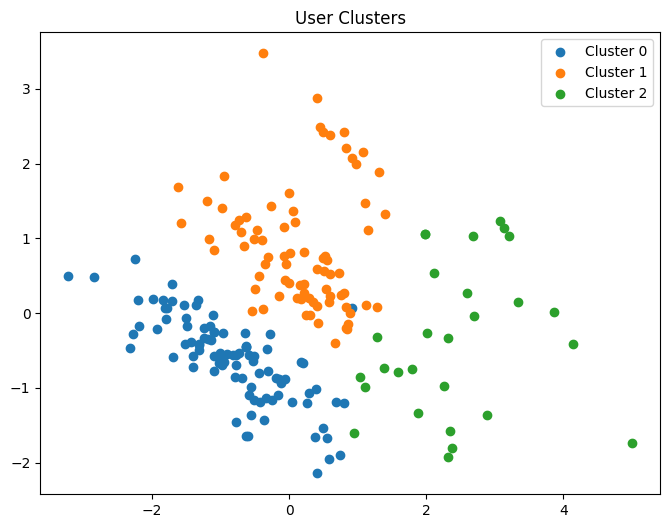

In [ ]:
# Step 5: Visualize the clusters (2D plot) using PCA
pca = PCA(n_components=2)
reduced_genre_preferences = pca.fit_transform(genre_preferences_scaled)

# Label the clusters
cluster_labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    plt.scatter(reduced_genre_preferences[user_clusters == i, 0], reduced_genre_preferences[user_clusters == i, 1], label=cluster_labels[i])
plt.title("User Clusters")
plt.legend()
plt.show()

# Calculate Genre Preferences for Clusters

This cell calculates genre preferences for each cluster by aggregating the preferences of users within the same cluster.
It computes the sum of ratings and count of ratings for each genre within each cluster.
It also calculates normalized ratings within each cluster.

In [ ]:
# Calculate genre preferences for clusters
cluster_genre_preferences = {}
for cluster_id in range(num_clusters):
    cluster_genre_prefs = {genre_id: {'sum_ratings': 0, 'count_ratings': 0} for genre_id in range(1, 21)}
    for user_id, prefs in user_genre_preferences.items():
        if prefs['cluster'] == cluster_id:
            for genre_id, genre_prefs in prefs.items():
                if genre_id != 'cluster':
                    if genre_id not in cluster_genre_prefs:
                        cluster_genre_prefs[genre_id] = {'sum_ratings': 0, 'count_ratings': 0}
                    cluster_genre_prefs[genre_id]['sum_ratings'] += genre_prefs['sum_ratings']
                    cluster_genre_prefs[genre_id]['count_ratings'] += genre_prefs['count_ratings']
    # Calculate normalized ratings within the cluster
    for genre_id in cluster_genre_prefs:
        sum_ratings = cluster_genre_prefs[genre_id]['sum_ratings']
        count_ratings = cluster_genre_prefs[genre_id]['count_ratings']
        if count_ratings > 0:
            cluster_genre_prefs[genre_id]['normalized_rating'] = sum_ratings / count_ratings
        else:
            cluster_genre_prefs[genre_id]['normalized_rating'] = 0
    cluster_genre_preferences[cluster_id] = cluster_genre_prefs

# Print number of users and Preferences for Clusters

This cell prints information about genre preferences for each cluster, including the number of users and genres within each cluster.

In [ ]:
# Print number of users and Preferences for Clusters
for cluster_id, genre_prefs in cluster_genre_preferences.items():
    num_users_in_cluster = sum(1 for user_id, prefs in user_genre_preferences.items() if prefs['cluster'] == cluster_id)
    num_genres = len([genre_id for genre_id in genre_prefs if genre_id <= 20])
    print(f"\nCluster {cluster_id} - Users: {num_users_in_cluster}, Genres: {num_genres}")


Cluster 0 - Users: 94, Genres: 20

Cluster 1 - Users: 78, Genres: 20

Cluster 2 - Users: 28, Genres: 20


# Generate Movie Recommendations for Each Cluster

This cell generates movie recommendations for each cluster based on the preferred genre.
It identifies the most preferred genre for each cluster and recommends movies from that genre that the cluster users haven't seen.

In [ ]:
# Step 8: Generate movie recommendations for each cluster
recommendation_data = []
def generate_cluster_recommendations(cluster_id, genre_prefs, movies, ratings):
    # Calculate the cluster's preferred genre ID based on genre preferences
    cluster_preferred_genre_id = max(genre_prefs, key=lambda k: genre_prefs[k]['normalized_rating'])
    # Find movies in the recommended genre that the cluster hasn't seen
    cluster_ratings = ratings[ratings['userId'].isin([user_id for user_id, prefs in user_genre_preferences.items() if prefs['cluster'] == cluster_id])]
    cluster_rated_movies = cluster_ratings['movieId'].tolist()
    all_movies = movies['movieId'].tolist()
    cluster_not_seen_movies = list(set(all_movies) - set(cluster_rated_movies))
    recommended_movies = []
    for movie_id in cluster_not_seen_movies:
        movie_info = movies[movies['movieId'] == movie_id]
        if not movie_info.empty:
            movie_genres = ast.literal_eval(movie_info['genres'].values[0])
            # Convert movie_genres to a list of strings
            genres = [genre['name'] for genre in movie_genres]
            genres_str = ', '.join(genres)  # Convert genres to a string
            for genre in movie_genres:
                genre_id = genre['id']
                if genre_id == cluster_preferred_genre_id and genre_id in genre_prefs:
                    rating = genre_prefs[genre_id]['normalized_rating']
                    recommended_movies.append((movie_id, rating))
    # Sort recommended movies by rating in descending order
    recommended_movies.sort(key=lambda x: x[1], reverse=True)
    # Get the top 2 recommended movies or fewer if there are less than 2
    top_recommended_movies = recommended_movies[:2]
    recommendations = [f"Cluster {cluster_id}"]
    for i in range(2):
        if i < len(top_recommended_movies):
            movie_id, rating = top_recommended_movies[i]
            movie_info = movies[movies['movieId'] == movie_id]
            title = movie_info['title'].values[0]
            recommendations.append(f"Movie: {title}\nGenres: {genres_str}\nRating: {rating}")
        else:
            recommendations.append(None)
    recommendation_data.append(recommendations)

# Print Recommendation Data

This cell creates a table of movie recommendations for each cluster.
It prints the table using the tabulate library.

In [ ]:
# Generate movie recommendations for each cluster
for cluster_id, genre_prefs in cluster_genre_preferences.items():
    generate_cluster_recommendations(cluster_id, genre_prefs, movies, ratings)

# Create a table for recommendation data
table_headers = ["Cluster Name", "Movie Recommended 1", "Movie Recommended 2"]
table_data = []
for row in recommendation_data:
    table_data.append([row[0], row[1], row[2]])

# Print the table using tabulate
table = tabulate(table_data, headers=table_headers, tablefmt="fancy_grid")
print(table)

╒════════════════╤══════════════════════════════════════════╤══════════════════════════════════════════╕
│ Cluster Name   │ Movie Recommended 1                      │ Movie Recommended 2                      │
╞════════════════╪══════════════════════════════════════════╪══════════════════════════════════════════╡
│ Cluster 0      │ Movie: Pearl                             │ Movie: Princes and Princesses            │
│                │ Genres: Drama                            │ Genres: Drama                            │
│                │ Rating: 3.8085106382978724               │ Rating: 3.8085106382978724               │
├────────────────┼──────────────────────────────────────────┼──────────────────────────────────────────┤
│ Cluster 1      │ Movie: Duel                              │ Movie: AE: Apocalypse Earth              │
│                │ Genres: Crime, Thriller, Action, Mystery │ Genres: Crime, Thriller, Action, Mystery │
│                │ Rating: 4.5                         

# Calculate Similarity Function

This cell defines a function calculate_similarity that calculates the cosine similarity between two clusters.
It converts cluster preferences into arrays and uses cosine similarity for comparison.

In [ ]:
def calculate_similarity(cluster1, cluster2):
    # Convert cluster dictionaries into arrays for similarity calculation
    cluster1_array = [cluster1.get(genre_id, {'normalized_rating': 0})['normalized_rating'] for genre_id in range(1, 21)]
    cluster2_array = [cluster2.get(genre_id, {'normalized_rating': 0})['normalized_rating'] for genre_id in range(1, 21)]
    # Calculate cosine similarity between the two clusters
    similarity = cosine_similarity([cluster1_array], [cluster2_array])
    return similarity[0][0]

threshold = 0.7

# Create a Cluster Similarity Network Graph

This cell creates a network graph to represent the similarity between clusters.
It uses the NetworkX library to create nodes for clusters and edges between clusters based on similarity.
The graph is visualized using Matplotlib.

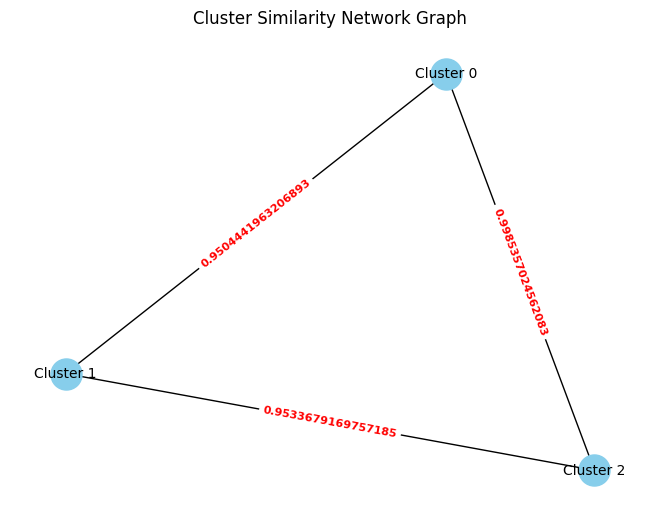

In [ ]:
# Create a graph
G = nx.Graph()

# Add nodes for clusters
for cluster_id in cluster_genre_preferences:
    G.add_node(f'Cluster {cluster_id}')

# Add edges between clusters based on similarity (you need to implement calculate_similarity)
for i, cluster_id1 in enumerate(cluster_genre_preferences):
    for j, cluster_id2 in enumerate(cluster_genre_preferences):
        if i < j:
            # Calculate some measure of similarity between clusters
            similarity = calculate_similarity(cluster_genre_preferences[cluster_id1], cluster_genre_preferences[cluster_id2])

            # Add an edge if similarity meets a certain threshold
            if similarity > threshold:
                G.add_edge(f'Cluster {cluster_id1}', f'Cluster {cluster_id2}', weight=similarity)

# Draw the graph
pos = nx.spring_layout(G)  # Positioning the nodes
labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red', font_size=8, font_weight='bold')
plt.title("Cluster Similarity Network Graph")
plt.show()
